<a href="https://colab.research.google.com/github/vasudevan-gomathy/Fraud-Transaction-Analysis/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transaction Fraud Detection



**Importing necessary Packages**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

**Importing the dataset**

In [3]:
df = pd.read_csv('/content/creditcard.csv')

**Exploring the Data**

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Checking for Null Values**

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Eliminating the rows with null values
df.dropna(how = 'any', inplace = True)

**Scaling the Amount Feature**

In [9]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [10]:
df = df.drop(['Time'], axis = 1)

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


**Checking for Duplicates**

In [12]:
df.duplicated().any()

True

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(275663, 30)

**Splitting the data**

In [15]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Balancing the dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


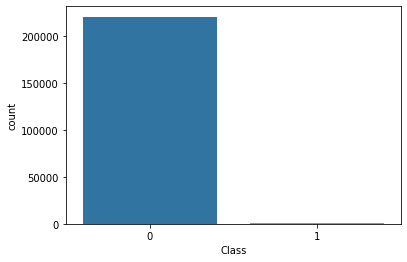

In [17]:
sns.countplot(y_train)

In [18]:
# Balancing
from imblearn.combine import SMOTEENN
Balance = SMOTEENN()
X_train, y_train = Balance.fit_resample(X_train, y_train)
y_train.value_counts() 

1    220166
0    219832
Name: Class, dtype: int64

**Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
L = LogisticRegression()
L.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = L.predict(X_test)

In [23]:
evaluation_LogisticReg = pd.DataFrame({'Metrics': ['ACC', 'AUC'],
                       'Score':[accuracy_score(y_test, y_pred),
                                roc_auc_score(y_test, y_pred)]})
evaluation_LogisticReg

,Metrics,Score
0,ACC,0.977563
1,AUC,0.920088


**Decision Tree Classifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred1 = dt.predict(X_test)

In [27]:
evaluation_DecisionTree = pd.DataFrame({'Metrics': ['ACC', 'AUC'],
                          'Score':[accuracy_score(y_test, y_pred1),
                                  roc_auc_score(y_test, y_pred1)]})
evaluation_DecisionTree

,Metrics,Score
0,ACC,0.997334
1,AUC,0.884212


**Random Forest Classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred2 = dt.predict(X_test)

In [31]:
evaluation_Randomforest = pd.DataFrame({'Metrics': ['ACC', 'AUC'],
                          'Score':[accuracy_score(y_test, y_pred2),
                                  roc_auc_score(y_test, y_pred2)]})
evaluation_Randomforest

,Metrics,Score
0,ACC,0.997334
1,AUC,0.884212


**Naive Bayes Classifier**

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred3 = gnb.predict(X_test)

In [34]:
evaluation_NB = pd.DataFrame({'Metrics': ['ACC', 'AUC'],
                          'Score':[accuracy_score(y_test, y_pred3),
                                  roc_auc_score(y_test, y_pred3)]})
evaluation_NB

,Metrics,Score
0,ACC,0.975913
1,AUC,0.887215


**Grdient Boosting Classifier**

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)

In [38]:
evaluation_GBC = pd.DataFrame({'Metrics': ['ACC', 'AUC'],
                          'Score':[accuracy_score(y_test, y_pred4),
                                  roc_auc_score(y_test, y_pred4)]})
evaluation_GBC

,Metrics,Score
0,ACC,0.988029
1,AUC,0.934488


**Model Evaluation**

In [39]:
evaluation_report = pd.DataFrame({'Model': ['Log', 'DS', 'RF', 'NB', 'GBC'],
                                'ACC':[accuracy_score(y_test, y_pred)*100,
                                accuracy_score(y_test, y_pred1)*100,
                                accuracy_score(y_test, y_pred2)*100,
                                accuracy_score(y_test, y_pred3)*100,
                                accuracy_score(y_test, y_pred4)*100],                      
                                'AUC':[roc_auc_score(y_test, y_pred)*100,
                                roc_auc_score(y_test, y_pred1)*100,
                                roc_auc_score(y_test, y_pred2)*100,
                                roc_auc_score(y_test, y_pred3)*100,
                                roc_auc_score(y_test, y_pred4)*100]})
evaluation_report

,Model,ACC,AUC
0,Log,97.756335,92.008842
1,DS,99.733372,88.421249
2,RF,99.733372,88.421249
3,NB,97.591279,88.721502
4,GBC,98.802895,93.448772


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


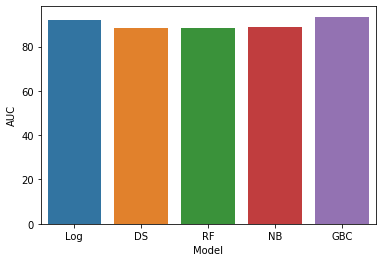

In [40]:
sns.barplot(evaluation_report['Model'], evaluation_report['AUC'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


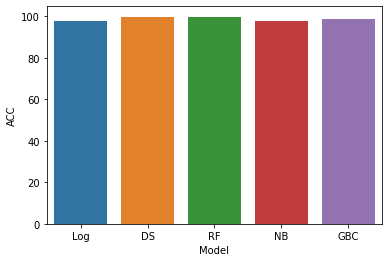

In [41]:
sns.barplot(evaluation_report['Model'], evaluation_report['ACC'])

**Saving the Model**

In [42]:
import joblib
joblib.dump(gbc, 'Fraud_Detection')

['Fraud_Detection']